# Sales Insights and Predicting Outlet Sales

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import array 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_sales=pd.read_csv('E:/IITK IME/Competitions/enigma 3.0 iims/622e352070d4f_Enigma3.0_Datonics_Round2/Enigma3.0_Datonics_Round2/sales data-set.csv')
df_stores=pd.read_csv('E:/IITK IME/Competitions/enigma 3.0 iims/622e352070d4f_Enigma3.0_Datonics_Round2/Enigma3.0_Datonics_Round2/stores data-set.csv')
df_features=pd.read_csv('E:/IITK IME/Competitions/enigma 3.0 iims/622e352070d4f_Enigma3.0_Datonics_Round2/Enigma3.0_Datonics_Round2/features data set.csv')

In [3]:
df_sales.head(100)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05-02-2010,6871.20,False
1,1,1,12-02-2010,12315.65,True
2,1,1,19-02-2010,7751.11,False
3,1,1,26-02-2010,6014.71,False
4,1,1,05-03-2010,6120.60,False
...,...,...,...,...,...
95,1,1,02-12-2011,7891.92,False
96,1,1,09-12-2011,9705.88,False
97,1,1,16-12-2011,12158.20,False
98,1,1,23-12-2011,12738.13,False


In [4]:
len(df_sales)

414819

In [5]:
df_sales['Date'].nunique()

143

In [6]:
df_stores.head()

,Store,Type,Size
0,1,C,39910
1,2,B,118221
2,3,A,151315
3,4,A,202307
4,5,B,37392


In [7]:
print(len(df_features))
print(df_features['Date'].nunique())
df_features.head()

8008
182


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05-02-2010,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,False
1,1,12-02-2010,33.16,2.671,NaN,NaN,NaN,NaN,NaN,126.496258,8.119,True
2,1,19-02-2010,35.70,2.654,NaN,NaN,NaN,NaN,NaN,126.526286,8.119,False
3,1,26-02-2010,29.98,2.667,NaN,NaN,NaN,NaN,NaN,126.552286,8.119,False
4,1,05-03-2010,40.65,2.681,NaN,NaN,NaN,NaN,NaN,126.578286,8.119,False


In [8]:
df_features[df_features['Store']==1]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05-02-2010,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,False
1,1,12-02-2010,33.16,2.671,NaN,NaN,NaN,NaN,NaN,126.496258,8.119,True
2,1,19-02-2010,35.70,2.654,NaN,NaN,NaN,NaN,NaN,126.526286,8.119,False
3,1,26-02-2010,29.98,2.667,NaN,NaN,NaN,NaN,NaN,126.552286,8.119,False
4,1,05-03-2010,40.65,2.681,NaN,NaN,NaN,NaN,NaN,126.578286,8.119,False
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,28-06-2013,75.24,3.726,712.49,NaN,NaN,NaN,706.46,NaN,NaN,False
178,1,05-07-2013,85.58,3.696,869.96,NaN,56.83,NaN,1977.42,NaN,NaN,False
179,1,12-07-2013,78.93,3.666,182.25,NaN,6.63,NaN,1842.48,NaN,NaN,False
180,1,19-07-2013,80.81,3.665,118.82,NaN,3.15,NaN,514.08,NaN,NaN,False


In [9]:
df_features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4065
MarkDown2       5116
MarkDown3       4466
MarkDown4       4559
MarkDown5       4048
CPI              572
Unemployment     572
IsHoliday          0
dtype: int64

In [10]:
print(df_features.shape)
print(df_stores.shape)
print(df_sales.shape)

(8008, 12)
(44, 3)
(414819, 5)


In [11]:
df_sales.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

### 44 Stores in total

In [12]:
df_sales['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64)

In [13]:
df_sales['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 38, 40, 42, 44,
       46, 49, 52, 55, 56, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85,
       87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 19, 29, 30, 35, 36, 41,
       45, 47, 51, 54, 58, 77, 78, 37, 48, 39, 50, 43, 65], dtype=int64)

In [14]:
df_sales.pivot_table(values='Date', index=['Store'], columns='Dept', aggfunc='count')

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,143.0,143.0,143.0,143.0,143.0,133.0,143.0,143.0,143.0,143.0,...,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,2.0
2,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,...,143.0,143.0,143.0,143.0,134.0,143.0,2.0,143.0,135.0,NaN
3,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,...,143.0,143.0,143.0,143.0,143.0,143.0,122.0,143.0,143.0,37.0
4,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,...,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,42.0
5,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,...,143.0,143.0,143.0,NaN,54.0,143.0,143.0,140.0,36.0,NaN
6,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,...,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,42.0
7,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,...,143.0,143.0,143.0,NaN,74.0,143.0,143.0,127.0,23.0,NaN
8,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,...,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,40.0
9,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,143.0,...,143.0,143.0,143.0,143.0,115.0,143.0,143.0,143.0,141.0,1.0


In [15]:
df_sales.head(100)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05-02-2010,6871.20,False
1,1,1,12-02-2010,12315.65,True
2,1,1,19-02-2010,7751.11,False
3,1,1,26-02-2010,6014.71,False
4,1,1,05-03-2010,6120.60,False
...,...,...,...,...,...
95,1,1,02-12-2011,7891.92,False
96,1,1,09-12-2011,9705.88,False
97,1,1,16-12-2011,12158.20,False
98,1,1,23-12-2011,12738.13,False


# Insight 1

#### How many departments does each store has

In [16]:
dfone=df_sales[['Store','Dept']]

for i in range(1,45):
    print(i,' ',dfone[dfone['Store']==i]['Dept'].nunique())

1   62
2   74
3   77
4   78
5   72
6   78
7   72
8   77
9   76
10   76
11   73
12   77
13   78
14   75
15   79
16   77
17   79
18   76
19   76
20   78
21   79
22   78
23   77
24   76
25   77
26   77
27   77
28   76
29   78
30   77
31   77
32   64
33   76
34   77
35   63
36   78
37   74
38   63
39   62
40   63
41   75
42   77
43   77
44   62


Number of departments per store is varying across stores so it can be added as new feature

# Insight 2

#### Does store size matters

In [17]:
df_two=df_sales[['Store', 'Weekly_Sales']].groupby(['Store'], as_index=False).sum().sort_values(by='Weekly_Sales', ascending=True)

In [18]:
df_two

,Store,Weekly_Sales
34,35,3.716022e+07
0,1,4.329309e+07
6,7,4.547569e+07
37,38,5.341221e+07
39,40,5.515963e+07
4,5,5.758674e+07
31,32,6.271689e+07
38,39,7.420274e+07
17,18,7.425243e+07
30,31,7.714155e+07


In [19]:
# df_two=df_two.append(df_stores['Size'], ignore_index=False)
# df_two
df_two=pd.merge(df_two,df_stores, on='Store')
df_two

,Store,Weekly_Sales,Type,Size
0,35,3.716022e+07,A,39690
1,1,4.329309e+07,C,39910
2,7,4.547569e+07,B,34875
3,38,5.341221e+07,A,39910
4,40,5.515963e+07,C,39690
5,5,5.758674e+07,B,37392
6,32,6.271689e+07,C,42988
7,39,7.420274e+07,C,39910
8,18,7.425243e+07,B,57197
9,31,7.714155e+07,B,93638


In [20]:
df_two.to_csv('file1.csv')

In [21]:
# df_two.drop(['Type_y','Size_y'], axis=1)

Text(0, 0.5, 'Total Sales')

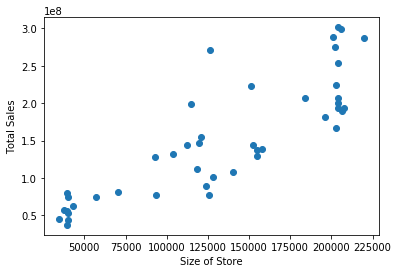

In [22]:
plt.scatter(df_two['Size'],df_two['Weekly_Sales'])
plt.xlabel('Size of Store')
plt.ylabel('Total Sales')

Has positive correlatiion
(Do r2 value to say it has good relation)

# Insight 3

#### How inflation affects Weekly Sales

In [23]:
df_try=df_sales[['Store','Date', 'Weekly_Sales']].groupby(['Store','Date'], as_index=True).sum().sort_values(by='Weekly_Sales', ascending=False)
df_try

Weekly_Sales
Store Date                    
16    24-12-2010    3818686.45
22    24-12-2010    3766687.43
12    24-12-2010    3749057.69
6     23-12-2011    3676388.98
15    24-12-2010    3595903.20
...                        ...
35    02-12-2011     220060.35
      31-12-2010     219804.85
      30-12-2011     215359.21
      29-10-2010     213538.32
      03-12-2010     209986.25

[6292 rows x 1 columns]

In [24]:
df_three=pd.merge(df_try,df_features[['Store','Date','CPI']], on=['Date','Store'])
df_three

,Date,Store,Weekly_Sales,CPI
0,24-12-2010,16,3818686.45,182.544590
1,24-12-2010,22,3766687.43,204.637673
2,24-12-2010,12,3749057.69,126.983581
3,23-12-2011,6,3676388.98,129.984548
4,24-12-2010,15,3595903.20,126.983581
...,...,...,...,...
6287,02-12-2011,35,220060.35,129.845967
6288,31-12-2010,35,219804.85,127.087677
6289,30-12-2011,35,215359.21,130.071032
6290,29-10-2010,35,213538.32,126.436419


Text(0, 0.5, 'Total Sales on a Store in a day')

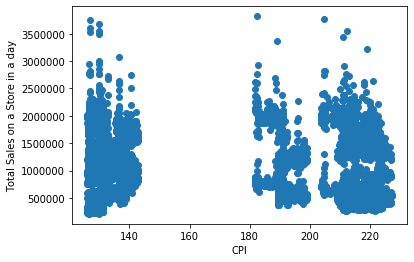

In [25]:
plt.scatter(df_three['CPI'],df_three['Weekly_Sales'])
plt.xlabel('CPI')
plt.ylabel('Total Sales on a Store in a day')

In [26]:
merged=pd.merge(df_sales,df_features, on=['Date','Store'])
merged

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05-02-2010,6871.20,False,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,False
1,1,2,05-02-2010,8577.33,False,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,False
2,1,3,05-02-2010,584.93,False,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,False
3,1,4,05-02-2010,6516.95,False,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,False
4,1,5,05-02-2010,819.00,False,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414814,44,94,26-10-2012,33387.91,False,70.50,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,False
414815,44,95,26-10-2012,54892.79,False,70.50,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,False
414816,44,96,26-10-2012,17296.52,False,70.50,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,False
414817,44,97,26-10-2012,14449.62,False,70.50,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,False


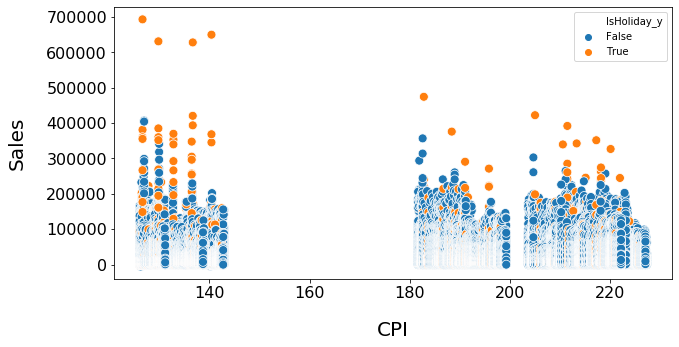

In [27]:
plt.figure(figsize=(10,5))
sn.scatterplot(x=merged.CPI, y=merged.Weekly_Sales, hue=merged.IsHoliday_y, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('CPI', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

This shows though inflations peaks the sales amount doesn't seems to change

# Insight 4

#### Check if Unemployment has relationship with Sales

In [28]:
df_four=pd.merge(df_try,df_features[['Store','Date','Unemployment']], on=['Date','Store'])
df_four

,Date,Store,Weekly_Sales,Unemployment
0,24-12-2010,16,3818686.45,8.724
1,24-12-2010,22,3766687.43,7.484
2,24-12-2010,12,3749057.69,9.003
3,23-12-2011,6,3676388.98,5.143
4,24-12-2010,15,3595903.20,7.795
...,...,...,...,...
6287,02-12-2011,35,220060.35,8.010
6288,31-12-2010,35,219804.85,9.265
6289,30-12-2011,35,215359.21,8.010
6290,29-10-2010,35,213538.32,9.265


Text(0, 0.5, 'Total Sales on a Store in a day')

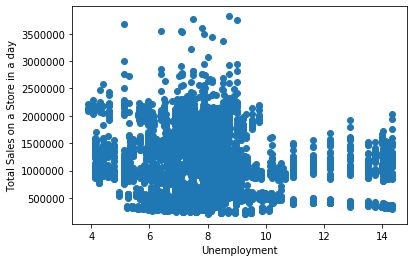

In [29]:
plt.scatter(df_four['Unemployment'],df_three['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.ylabel('Total Sales on a Store in a day')

Prove with r2 though it has poor relation

# Insight 5

#### Is holiday affecting sales

In [30]:
df_try1=df_sales['IsHoliday'].value_counts()
df_try1[:]

False    385630
True      29189
Name: IsHoliday, dtype: int64

In [31]:
df_five=df_sales[['IsHoliday', 'Weekly_Sales']].groupby(['IsHoliday'], as_index=True).sum().sort_values(by='Weekly_Sales', ascending=False)
df_five

,Weekly_Sales
IsHoliday,
False,6.147713e+09
True,4.989401e+08


In [32]:
df_five['Number of Instance']=df_try1[:]
df_five['Average Weekly Sales']=df_five['Weekly_Sales']/df_try1

In [33]:
df_five

,Weekly_Sales,Number of Instance,Average Weekly Sales
IsHoliday,,,
False,6.147713e+09,385630,15942.000008
True,4.989401e+08,29189,17093.428647


Average Sales is not varying that much if holiday

# Insight 6

#### Does fuel price affect sales

In [34]:
df_six=pd.merge(df_try,df_features[['Store','Date','Fuel_Price']], on=['Date','Store'])
df_six

,Date,Store,Weekly_Sales,Fuel_Price
0,24-12-2010,16,3818686.45,3.141
1,24-12-2010,22,3766687.43,3.141
2,24-12-2010,12,3749057.69,3.236
3,23-12-2011,6,3676388.98,3.103
4,24-12-2010,15,3595903.20,2.846
...,...,...,...,...
6287,02-12-2011,35,220060.35,3.701
6288,31-12-2010,35,219804.85,3.148
6289,30-12-2011,35,215359.21,3.428
6290,29-10-2010,35,213538.32,3.130


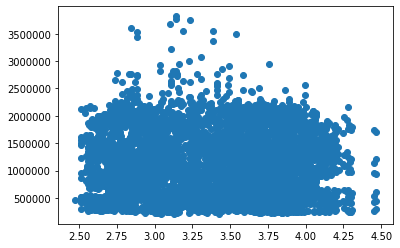

In [35]:
plt.scatter(df_six['Fuel_Price'],df_six['Weekly_Sales'])

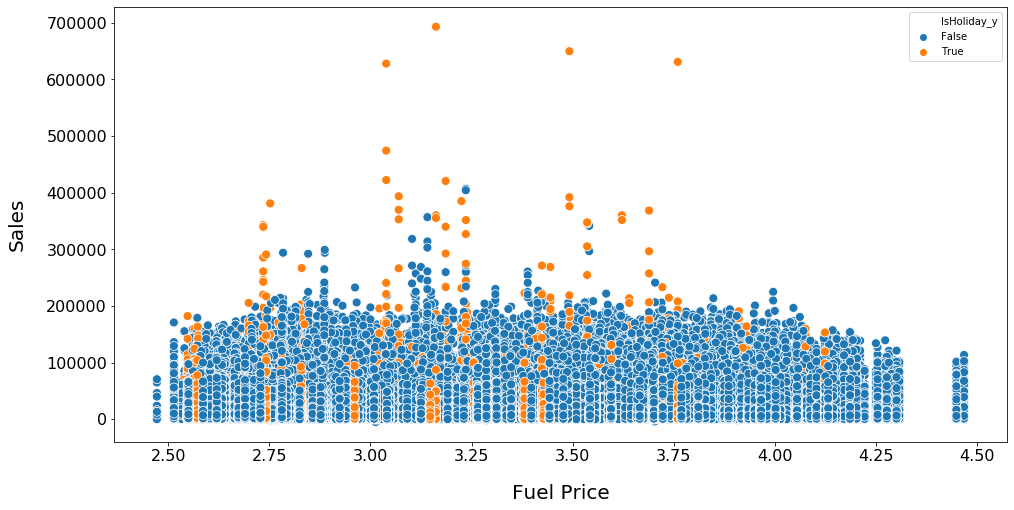

In [36]:
plt.figure(figsize=(16,8))
sn.scatterplot(x=merged.Fuel_Price, y=merged.Weekly_Sales, hue=merged.IsHoliday_y, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Fuel Price', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

No relation;show with r2 

# Insight 7

#### Relating temperature with Sales

In [37]:
df_seven=pd.merge(df_try,df_features[['Store','Date','Temperature']], on=['Date','Store'])
df_seven

,Date,Store,Weekly_Sales,Temperature
0,24-12-2010,16,3818686.45,30.59
1,24-12-2010,22,3766687.43,25.17
2,24-12-2010,12,3749057.69,57.06
3,23-12-2011,6,3676388.98,35.92
4,24-12-2010,15,3595903.20,34.90
...,...,...,...,...
6287,02-12-2011,35,220060.35,59.12
6288,31-12-2010,35,219804.85,52.91
6289,30-12-2011,35,215359.21,51.60
6290,29-10-2010,35,213538.32,71.34


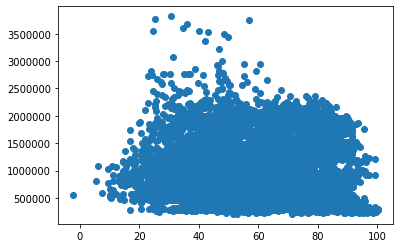

In [38]:
plt.scatter(df_seven['Temperature'],df_six['Weekly_Sales'])

Not much relation

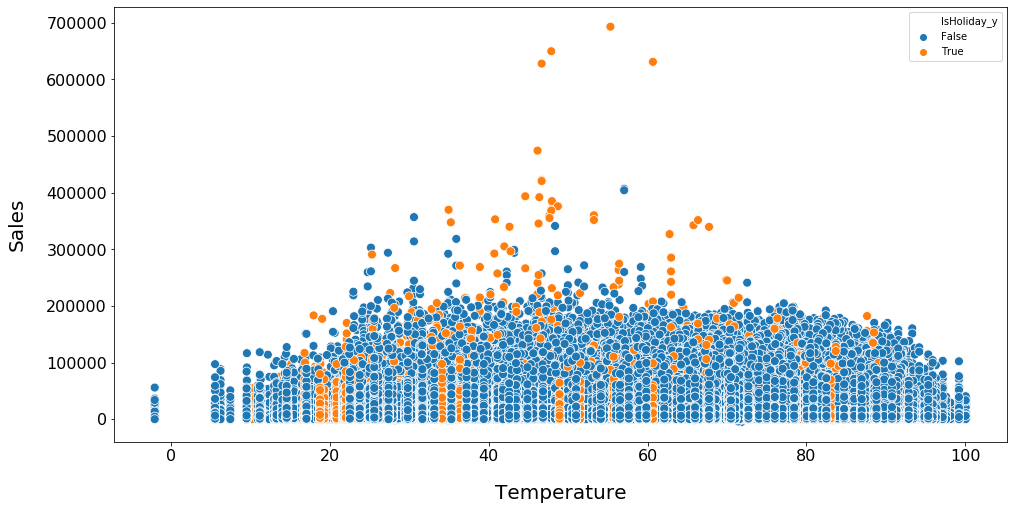

In [39]:
plt.figure(figsize=(16,8))
sn.scatterplot(x=merged.Temperature, y=merged.Weekly_Sales, hue=merged.IsHoliday_y, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

# Insight 8

#### Finding which store has more sales

In [40]:
df_eight=df_sales[['Store', 'Weekly_Sales']].groupby(['Store'], as_index=False).sum().sort_values(by='Weekly_Sales', ascending=True)

In [41]:
df_eight

,Store,Weekly_Sales
34,35,3.716022e+07
0,1,4.329309e+07
6,7,4.547569e+07
37,38,5.341221e+07
39,40,5.515963e+07
4,5,5.758674e+07
31,32,6.271689e+07
38,39,7.420274e+07
17,18,7.425243e+07
30,31,7.714155e+07


### Top five stores with more overall sales

In [42]:
plot1=df_eight.tail(5)

<BarContainer object of 5 artists>

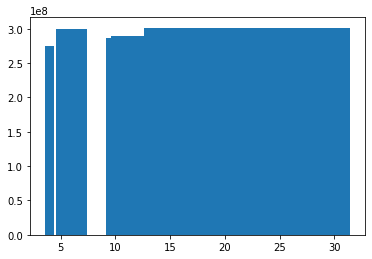

In [43]:
plt.bar(plot1['Store'],plot1['Weekly_Sales'])

# Insight 9

In [44]:
df_save = df_sales.copy()
df_save['Date'] = pd.to_datetime(df_save['Date'])
df_save['Year'] = pd.to_datetime(df_save['Date']).dt.year
df_save['Month'] = pd.to_datetime(df_save['Date']).dt.month
df_save['Week'] = pd.to_datetime(df_save['Date']).dt.week
df_save['Day'] = pd.to_datetime(df_save['Date']).dt.day
df_save.replace({'A': 1, 'B': 2,'C':3},inplace=True)

In [45]:
sales_2010 = df_save[(df_save.Year == 2010)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df_2010 = pd.DataFrame(list(sales_2010.items()), columns=['Month', 'AvgSales2010'])

sales_2011 = df_save[df_save.Year == 2011].groupby('Month')['Weekly_Sales'].mean().to_dict()
df_2011 = pd.DataFrame(list(sales_2011.items()), columns=['Month', 'AvgSales2011'])

sales_2012 = df_save[df_save.Year == 2012].groupby('Month')['Weekly_Sales'].mean().to_dict()
df_2012 = pd.DataFrame(list(sales_2012.items()), columns=['Month', 'AvgSales2012'])

monthly_merged = df_2010.merge(df_2011, how='right', on='Month').merge(df_2012, how='left', on='Month')

In [46]:
monthly_merged.to_csv('insight8.csv')

# Data Preparation

In [47]:
df_save

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,Day
0,1,1,2010-05-02,6871.20,False,2010,5,17,2
1,1,1,2010-12-02,12315.65,True,2010,12,48,2
2,1,1,2010-02-19,7751.11,False,2010,2,7,19
3,1,1,2010-02-26,6014.71,False,2010,2,8,26
4,1,1,2010-05-03,6120.60,False,2010,5,18,3
...,...,...,...,...,...,...,...,...,...
414814,44,98,2012-09-28,5701.87,False,2012,9,39,28
414815,44,98,2012-05-10,5601.47,False,2012,5,19,10
414816,44,98,2012-12-10,5971.28,False,2012,12,50,10
414817,44,98,2012-10-19,5960.84,False,2012,10,42,19


In [48]:
feature_store = df_features.merge(df_stores, how='inner', on = "Store")

In [49]:
train = df_sales.merge(feature_store, how='inner', on=['Store','Date','IsHoliday'])

In [50]:
train.tail(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
414809,44,87,26-10-2012,1109.98,False,70.5,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,C,39690
414810,44,90,26-10-2012,48793.79,False,70.5,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,C,39690
414811,44,91,26-10-2012,34567.83,False,70.5,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,C,39690
414812,44,92,26-10-2012,74357.33,False,70.5,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,C,39690
414813,44,93,26-10-2012,26805.40,False,70.5,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,C,39690
414814,44,94,26-10-2012,33387.91,False,70.5,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,C,39690
414815,44,95,26-10-2012,54892.79,False,70.5,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,C,39690
414816,44,96,26-10-2012,17296.52,False,70.5,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,C,39690
414817,44,97,26-10-2012,14449.62,False,70.5,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,C,39690
414818,44,98,26-10-2012,6567.83,False,70.5,4.301,NaN,0.75,2.0,NaN,1034.55,131.193097,6.943,C,39690


In [51]:
train = train.copy()

train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = pd.to_datetime(train['Date']).dt.year
train['Month'] = pd.to_datetime(train['Date']).dt.month
train['Week'] = pd.to_datetime(train['Date']).dt.week
train['Day'] = pd.to_datetime(train['Date']).dt.day
train.replace({'A': 1, 'B': 2,'C':3},inplace=True)

(19.0, 0.0)

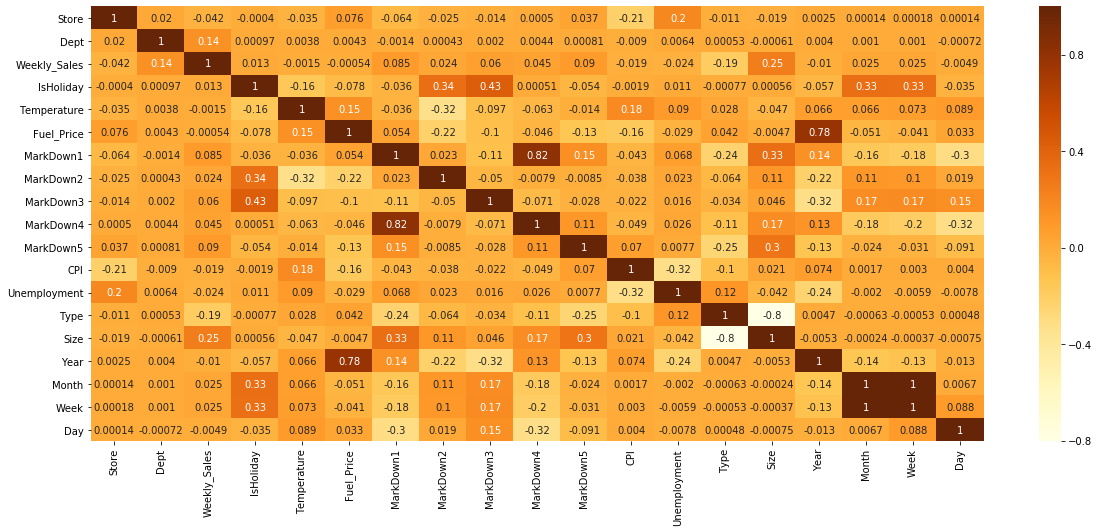

In [52]:
correlation=train.corr()
plt.figure(figsize=(20,8))
ax=sn.heatmap(correlation,annot=True,cmap="YlOrBr")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

Here we can see Weekly Sales has good correlatiion with size, dept, and type. Markdowns has no relationship with weekly sales so we don't want to consider that for regression

In [53]:
y_train = train['Weekly_Sales']

In [54]:
train= train.drop(['Weekly_Sales'],axis=1)

In [55]:
train.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2010-05-02,False,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,3,39910,2010,5,17,2
1,1,2,2010-05-02,False,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,3,39910,2010,5,17,2
2,1,3,2010-05-02,False,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,3,39910,2010,5,17,2
3,1,4,2010-05-02,False,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,3,39910,2010,5,17,2
4,1,5,2010-05-02,False,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,3,39910,2010,5,17,2


In [56]:
train.isnull().sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       266548
MarkDown2       304277
MarkDown3       279764
MarkDown4       280139
MarkDown5       265797
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Week                 0
Day                  0
dtype: int64

In [57]:
imputer = SimpleImputer(missing_values= np.NaN, strategy='mean')

In [58]:
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train.select_dtypes('object').columns.tolist()

In [59]:
imputer.fit(train[numeric_cols])

SimpleImputer()

In [60]:
train[numeric_cols] =imputer.transform(train[numeric_cols])

In [61]:
train.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
Day             0
dtype: int64

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
scaler.fit(train[numeric_cols])

MinMaxScaler()

In [65]:
train[numeric_cols] = scaler.transform(train[numeric_cols])

In [66]:
train[numeric_cols].describe().loc[['min', 'max']]

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [67]:
train= train.drop(['Date'],axis=1)

In [68]:
train.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,0.0,0.000000,False,0.328669,0.097194,0.083011,0.034524,0.010519,0.050238,0.041965,0.003737,0.406364,1.0,0.027253,0.0,0.363636,0.313725,0.033333
1,0.0,0.010204,False,0.328669,0.097194,0.083011,0.034524,0.010519,0.050238,0.041965,0.003737,0.406364,1.0,0.027253,0.0,0.363636,0.313725,0.033333
2,0.0,0.020408,False,0.328669,0.097194,0.083011,0.034524,0.010519,0.050238,0.041965,0.003737,0.406364,1.0,0.027253,0.0,0.363636,0.313725,0.033333
3,0.0,0.030612,False,0.328669,0.097194,0.083011,0.034524,0.010519,0.050238,0.041965,0.003737,0.406364,1.0,0.027253,0.0,0.363636,0.313725,0.033333
4,0.0,0.040816,False,0.328669,0.097194,0.083011,0.034524,0.010519,0.050238,0.041965,0.003737,0.406364,1.0,0.027253,0.0,0.363636,0.313725,0.033333


In [69]:
x =train[['Store','Dept','IsHoliday','Size','Week','Type','Year']]

In [70]:
y=y_train

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8 , random_state=0)

# Model

In [72]:
RF = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=27, max_features=6, min_samples_split=3,
                      n_estimators=58)

In [73]:
RF.score(x_train, y_train)

0.9879042668311842

In [74]:
y_pred = RF.predict(x_test)
y_pred

array([  924.13011156, 17424.11620977,  1328.83972989, ...,
        3151.04183908,  6641.98912644, 59260.00879598])

In [75]:
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [76]:
rmse(y_pred,y_test)

4724.010291337188

In [77]:
RF.score(x_test,y_test)

0.9562845004244573

In [78]:
importance_df = pd.DataFrame({
    'Feature': x_test.columns,
    'Importance': RF.feature_importances_
}).sort_values('Importance', ascending=False)

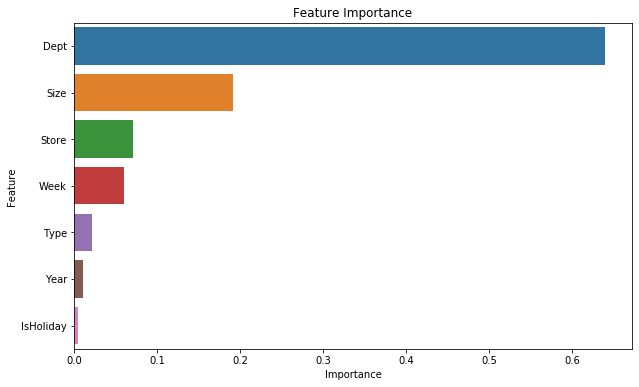

In [79]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature');

Department and size of store have more importance as compared to other features.

# Modelling mardowns

In [141]:
train2=train[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','IsHoliday']]

In [142]:
train2

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday
0,0.083011,0.034524,0.010519,0.050238,0.041965,False
1,0.083011,0.034524,0.010519,0.050238,0.041965,False
2,0.083011,0.034524,0.010519,0.050238,0.041965,False
3,0.083011,0.034524,0.010519,0.050238,0.041965,False
4,0.083011,0.034524,0.010519,0.050238,0.041965,False
...,...,...,...,...,...,...
414814,0.083011,0.002543,0.000220,0.050238,0.008298,False
414815,0.083011,0.002543,0.000220,0.050238,0.008298,False
414816,0.083011,0.002543,0.000220,0.050238,0.008298,False
414817,0.083011,0.002543,0.000220,0.050238,0.008298,False


In [143]:
x=train2[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]
y=train2['IsHoliday']

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8 , random_state=0)

In [146]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(acc_random_forest)

95.85


In [147]:
y_pred

array([False, False, False, ..., False, False, False])

In [167]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cmatrix=confusion_matrix(y_test, y_pred)
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.9564750976327082
1.0
0.3948382771912184


In [153]:
cmatrix

array([[76997,     0],
       [ 3611,  2356]], dtype=int64)

(2.0, 0.0)

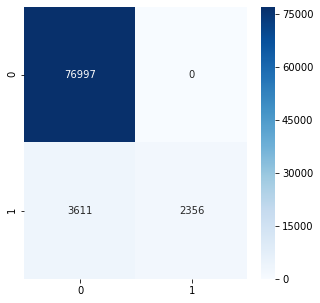

In [163]:
plt.figure(figsize=(5,5))
ax=sn.heatmap(cmatrix, annot=True,cmap='Blues', fmt='g')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)